In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline

data_breast_cancer = load_breast_cancer()

# Pandasによるデータの表示
df_target = pd.DataFrame(data_breast_cancer["target"], columns=["target"])
df_data = pd.DataFrame(data_breast_cancer["data"], columns=data_breast_cancer["feature_names"])
df = pd.concat([df_target, df_data], axis=1)

# 全ての行と列を表示
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# データの表示
print("データフレーム:")
df






データフレーム:


,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,0,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,0,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,0,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


In [2]:
# 欠損値の確認
missing_data = df.isnull().sum()
print("\n各列の欠損値の数:")
print(missing_data)

# 欠損値があるかどうかの確認
has_missing_data = missing_data.any()
print("\n欠損値が存在するか:")
print(has_missing_data)


各列の欠損値の数:
target                     0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

欠損値が存在するか:
False


In [3]:
print(data_breast_cancer.target_names)
# 0 = malignant：悪性、1 = benign：良性


['malignant' 'benign']


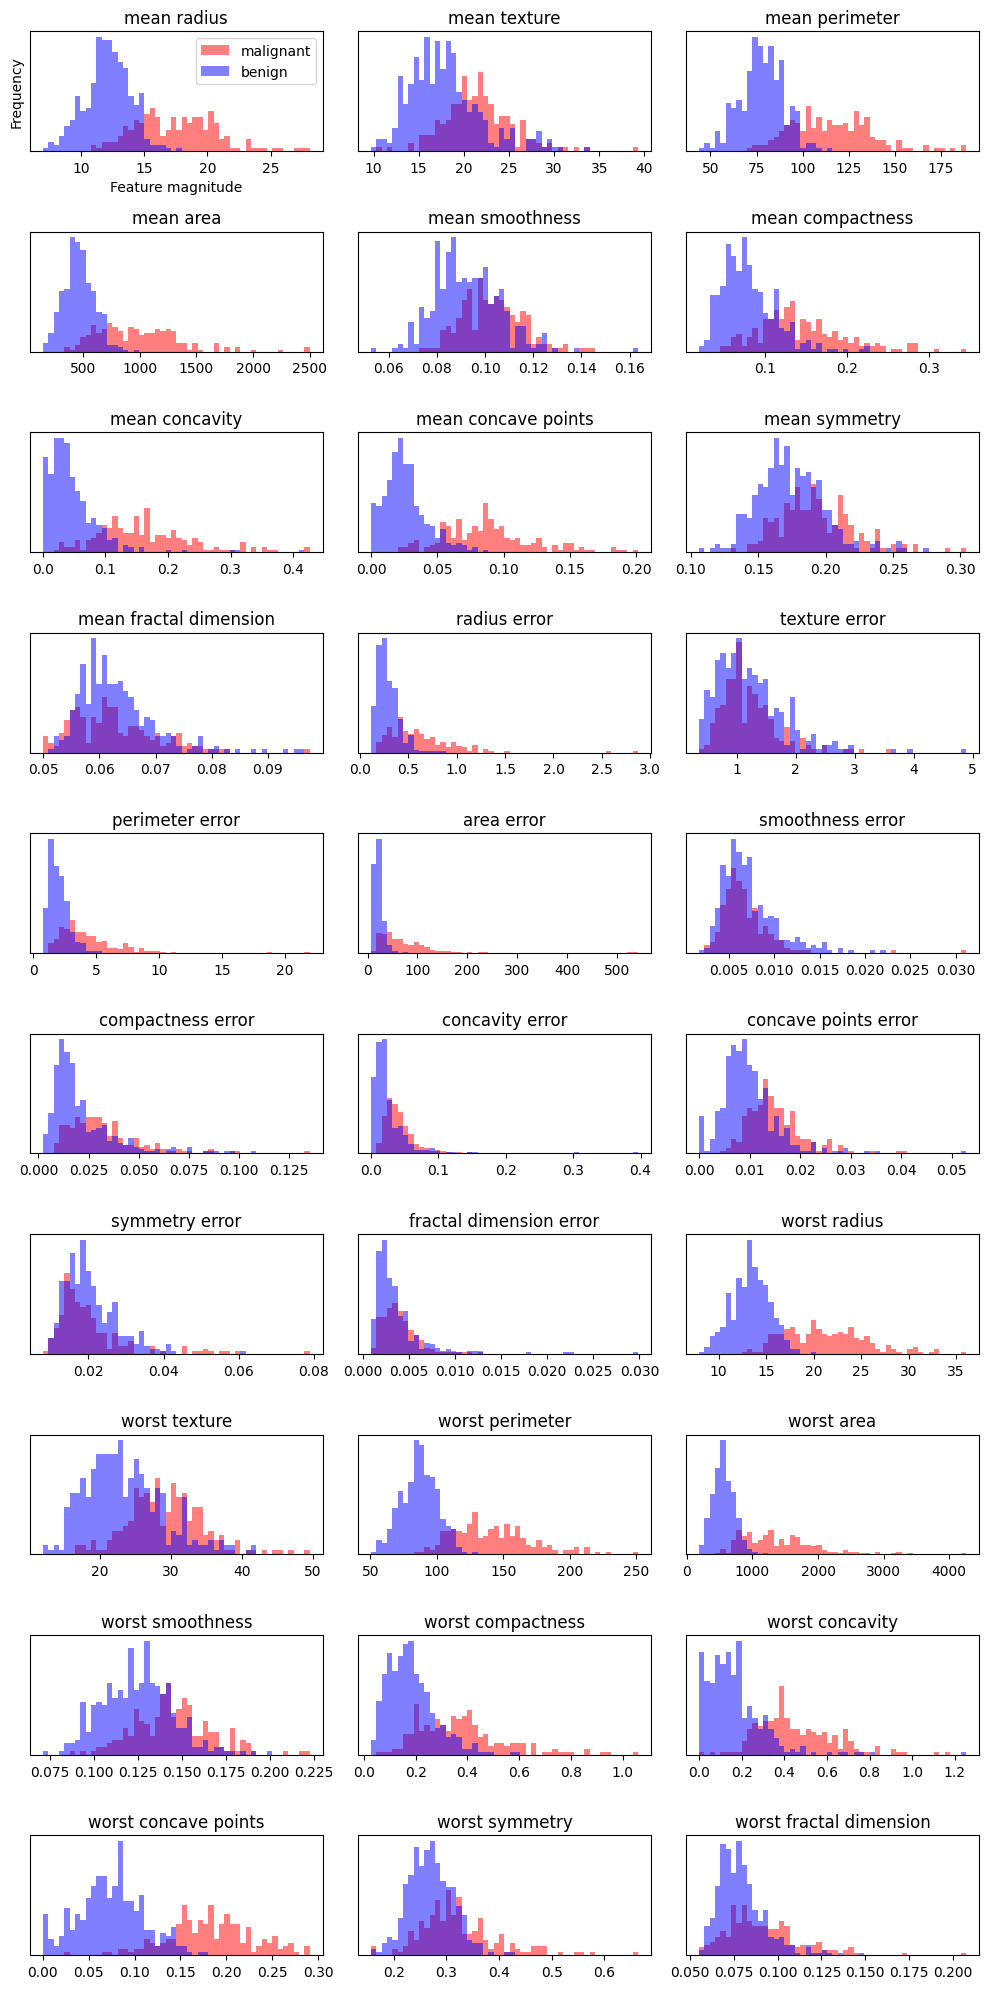

In [4]:
fig, axes = plt.subplots(10, 3, figsize=(10,20))

# targetによるデータフレームのソート
malignant = df[df["target"] == 0]
benign = df[df["target"] == 1]

ax = axes.ravel()
# 説明変数1~30のグラフ作成、dfはtargetと結合しているためインデックスに注意
for i in range(30):
  _, bins = np.histogram(df.iloc[:,i+1], bins=50)
  ax[i].hist(malignant.iloc[:,i+1].values, bins=bins, alpha=0.5,color='red')
  ax[i].hist(benign.iloc[:,i+1].values, bins=bins, alpha=0.5,color='blue')
  ax[i].set_title(df.columns[i+1])
  ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 目的変数の抽出
y = df["target"]

# 説明変数の抽出
X = df.loc[:, "mean radius":]

# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

# 標準化
scaler = StandardScaler()
# fit_transform 統計情報を計算して正規化を実行する
X_train_scaled = scaler.fit_transform(X_train)
# テストデータの変換には訓練データで計算された最小・最大値を使用
X_test_scaled = scaler.transform(X_test)



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 目的変数の抽出
y = df["target"]

# 説明変数の抽出
X = df.loc[:, "mean radius":]

# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 標準化されたデータをDataFrameに変換
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# 表示
print("標準化された訓練データ:")
display(X_train_scaled_df)  # 最初の5行を表示(.head())

print("\n標準化されたテストデータ:")
display(X_test_scaled_df)  # 最初の5行を表示(.head())





標準化された訓練データ:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.650799,-0.430573,-0.680248,-0.626983,-0.913819,-0.933352,-0.787631,-0.679444,0.254041,-0.798772,-0.689589,0.047238,-0.780363,-0.553374,0.215464,-0.594503,-0.559643,-0.528893,-0.307186,-0.734142,-0.666144,0.018492,-0.681179,-0.631501,0.191962,-0.507751,-0.695929,-0.364339,0.323499,-0.757849
1,-0.828353,0.152265,-0.827738,-0.753094,0.652812,-0.708753,-1.066546,-1.071909,0.489037,-0.341454,-0.373723,1.381566,-0.428297,-0.434922,2.090910,-0.828105,-0.904196,-1.140327,2.684419,-0.666009,-0.887045,0.023445,-0.900486,-0.771001,0.432101,-1.029169,-1.292774,-1.450367,0.625631,-1.030714
2,1.682772,2.189772,1.600098,1.673839,0.103624,-0.005326,0.705766,1.257731,-0.190645,-1.064688,1.257556,2.292502,1.147018,1.204005,-0.431290,-0.050023,0.248337,0.859912,-0.177807,-0.462371,1.508098,2.082033,1.401345,1.439992,-0.694368,-0.399657,0.262556,0.725046,-0.513298,-0.966014
3,-0.160411,-0.338290,-0.241878,-0.239207,-1.220208,-1.247434,-0.875740,-0.948189,-0.837790,-1.083682,-0.511784,-0.084728,-0.562325,-0.381268,-1.149591,-1.168242,-0.670111,-1.127289,-0.854000,-0.984597,-0.167070,0.076272,-0.252000,-0.253640,-1.200842,-1.164088,-0.825141,-0.967772,-0.888195,-1.176430
4,0.713269,0.234834,0.612740,0.553289,-1.546108,-0.642973,-0.665094,-0.672481,0.149196,-1.368593,-0.549088,-1.180967,-0.517649,-0.366203,-1.529993,-0.626358,-0.556141,-1.084449,-0.100911,-0.766115,0.585631,0.152210,0.584842,0.335264,-1.379854,0.258130,-0.109936,-0.425826,2.816487,-0.411282
5,-0.591614,-0.080870,-0.634363,-0.591983,-0.903702,-0.903326,-1.034618,-1.048568,-0.902866,-0.312232,-0.564080,-0.110389,-0.622540,-0.467940,0.068475,-0.832824,-0.823493,-1.050923,-0.075279,-0.364930,-0.547512,0.234752,-0.616626,-0.555007,-0.157330,-0.775347,-1.132724,-0.981809,-0.026089,-0.152482
6,-0.081498,-0.734135,-0.148468,-0.179763,-0.645728,-0.962982,-0.938858,-0.728964,-1.376474,-0.553310,-0.524684,0.276347,-0.536102,-0.411809,-0.477689,-1.011033,-0.841894,-0.958302,-0.609887,-0.618811,-0.246840,-0.009572,-0.315964,-0.329964,-0.751128,-1.002080,-1.093405,-0.911167,-0.845485,-0.698212
7,-0.450698,-0.039586,-0.418865,-0.479484,-0.633444,0.002576,0.182975,-0.134993,-0.982403,-0.113525,-0.155476,0.487126,0.180171,-0.272515,1.015230,1.018880,0.987234,1.347569,0.726632,0.187366,-0.602737,-0.529584,-0.543524,-0.580961,-0.999999,-0.346929,-0.154857,-0.345267,-1.226710,-0.656016
8,0.028417,0.101267,0.232955,-0.079208,-1.300418,2.363136,2.698747,0.743713,-0.364181,2.202287,-0.146411,0.509121,0.270980,-0.236195,-0.598115,2.913057,3.559206,1.899569,0.637531,3.527404,-0.207978,-0.314976,-0.013534,-0.305035,-1.878033,1.097171,2.063437,0.537379,-0.788539,1.387379
9,-1.445848,-0.462144,-1.366483,-1.133092,0.739526,0.743337,2.860685,-0.139119,1.107259,2.607006,-0.269829,-0.033408,-0.464232,-0.475162,0.907555,3.597344,8.662402,3.643619,2.628273,2.225265,-1.228624,-0.493266,-1.236814,-0.961212,0.685338,1.210537,4.959081,0.911187,2.106238,1.910605



標準化されたテストデータ:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.213959,0.312546,-0.143552,-0.282540,1.028572,0.853958,0.712142,0.840172,1.125336,1.553567,-0.049489,-0.516186,0.122383,-0.144983,-0.557028,-0.143228,0.089797,0.277433,-0.413376,0.111240,0.019060,0.663968,0.172169,-0.073844,1.087024,0.875052,1.217003,1.370438,1.089112,1.539283
1,-0.267507,1.461224,-0.329552,-0.334762,-0.611043,-1.019675,-0.776920,-0.734122,-0.671484,-0.990173,-0.684709,0.252519,-0.741514,-0.477020,-0.431644,-1.002598,-0.528444,-0.889048,-0.850338,-0.717394,-0.402289,1.418399,-0.476612,-0.434972,-0.157330,-0.965829,-0.658579,-0.842661,-0.715774,-0.881060
2,-0.039223,-0.867702,-0.104631,-0.144208,-1.207201,-0.945401,-0.864264,-0.583501,-0.779944,-0.987251,-0.664488,-1.021507,-0.599717,-0.442557,-0.761397,-0.934405,-0.715858,-0.159426,-1.065158,-0.612340,-0.287748,-1.044644,-0.322154,-0.339355,-1.270700,-0.996148,-1.044194,-0.505318,-1.202982,-0.924943
3,0.028417,-0.258150,-0.037851,-0.070319,-2.211637,-1.016712,-0.814790,-0.913113,-0.613639,-0.987251,-0.609403,-0.995664,-0.573008,-0.415524,-1.352189,-0.667061,-0.665654,-1.093593,-1.148156,-0.668293,-0.019803,-0.062398,-0.048906,-0.116018,-1.661471,-0.238177,-0.570251,-0.609984,-0.412060,-0.381463
4,-0.318237,-0.197438,-0.390596,-0.373929,-0.472301,-1.303930,-0.803697,-0.513607,-1.221015,-0.582532,-0.770125,2.070725,-0.811442,-0.547595,-0.933180,-1.190364,-0.581609,-0.010419,0.765690,-0.736807,-0.617055,-0.466852,-0.677937,-0.583522,-1.549698,-1.362017,-1.116219,-0.994015,-1.438677,-1.229315
5,-0.794534,-0.151296,-0.794143,-0.742260,0.616681,-0.368990,-0.581830,-0.598460,0.442038,-0.074076,-0.564080,-0.370656,-0.655562,-0.464432,0.563281,-0.511327,-0.340934,-0.106935,0.476416,-0.949960,-0.786821,-0.430534,-0.834458,-0.698434,0.689704,-0.629026,-0.540472,-0.455579,0.258643,-0.883873
6,-0.594433,0.846815,-0.548737,-0.585039,-1.952218,0.071714,-0.117566,-0.499422,-2.175463,0.580488,-0.994997,0.406480,-0.516192,-0.642749,-0.688788,1.210598,0.361352,0.841287,0.520357,1.387496,-0.766368,0.507139,-0.592455,-0.681701,-1.943525,0.451907,0.109622,-0.092756,-1.115981,0.559781
7,-0.693074,-0.029872,-0.729821,-0.665872,-0.594423,-1.010193,-0.928529,-0.971401,0.474576,-0.195346,-0.853101,0.399149,-0.841064,-0.607028,-0.326804,-0.941956,-0.677433,-0.688059,0.372668,-0.780960,-0.758186,0.150559,-0.782284,-0.690750,-0.445497,-0.950010,-0.960661,-0.882941,0.934091,-0.785416
8,-1.812230,1.519508,-1.809360,-1.332257,-1.111816,-1.084269,-1.130378,-1.267483,0.235964,1.495124,-0.094464,0.457801,-0.169467,-0.444827,2.009446,-0.907624,-1.009157,-1.981365,1.023230,1.202509,-1.480820,0.871973,-1.482354,-1.092175,-0.301413,-1.116764,-1.360156,-1.758873,0.255479,0.891158
9,-1.098912,-1.098409,-1.062901,-0.935593,0.177331,-0.238616,-0.673764,-0.742117,-0.620870,1.086022,-0.232873,2.376814,-0.217057,-0.440906,3.674148,1.276077,-0.177938,0.213090,1.991138,1.159117,-1.112037,-1.016580,-1.077935,-0.905891,0.152667,-0.588161,-0.998667,-1.137283,-0.731592,0.075375


In [7]:
# 訓練データとテストデータの要約統計量を表示するコード

# 訓練データの要約統計量
print("標準化された訓練データの要約統計量:")
train_summary = X_train_scaled_df.describe()
display(train_summary)

# テストデータの要約統計量
print("\n標準化されたテストデータの要約統計量:")
test_summary = X_test_scaled_df.describe()
display(test_summary)



標準化された訓練データの要約統計量:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,1.459448e-16,-2.251720e-16,-5.045521e-16,7.088748e-17,-1.188408e-15,1.834735e-16,9.173674e-17,1.000764e-16,9.403016e-16,1.250956e-17,8.339703e-18,4.586837e-16,9.173674e-17,-4.169852e-17,2.877198e-16,-5.420807e-17,-1.459448e-16,1.250956e-16,-1.042463e-16,-3.335881e-17,-1.084161e-16,5.462506e-16,-3.752867e-16,-4.169852e-17,-4.294947e-16,-2.501911e-17,5.003822e-17,-1.918132e-16,1.938981e-16,3.711168e-16
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-2.023041e+00,-2.312656e+00,-1.981021e+00,-1.430312e+00,-3.160432e+00,-1.665026e+00,-1.130378e+00,-1.267483e+00,-2.692455e+00,-1.849288e+00,-1.022539e+00,-1.556888e+00,-1.011998e+00,-6.906456e-01,-1.867892e+00,-1.346511e+00,-1.009157e+00,-1.981365e+00,-1.532390e+00,-1.072599e+00,-1.715425e+00,-2.248101e+00,-1.681616e+00,-1.199403e+00,-2.677913e+00,-1.486588e+00,-1.360156e+00,-1.758873e+00,-2.106216e+00,-1.603450e+00
25%,-6.881418e-01,-7.438490e-01,-6.832187e-01,-6.592052e-01,-7.031765e-01,-7.358151e-01,-7.467001e-01,-7.333480e-01,-6.859458e-01,-7.235262e-01,-6.000766e-01,-6.975479e-01,-6.040871e-01,-4.713963e-01,-6.283094e-01,-6.921322e-01,-5.143570e-01,-6.807781e-01,-6.657275e-01,-5.730400e-01,-6.661438e-01,-7.091121e-01,-6.806635e-01,-6.331662e-01,-7.282053e-01,-6.890046e-01,-7.689892e-01,-7.662973e-01,-6.580365e-01,-6.876632e-01
50%,-2.210048e-01,-1.027265e-01,-2.398295e-01,-2.939292e-01,-2.969849e-02,-1.903184e-01,-3.438961e-01,-3.965152e-01,-6.049317e-02,-1.434774e-01,-3.041698e-01,-1.736225e-01,-2.993677e-01,-3.459798e-01,-2.423288e-01,-2.738913e-01,-1.876474e-01,-1.526527e-01,-2.125927e-01,-2.357056e-01,-2.764983e-01,-6.817629e-02,-2.910562e-01,-3.467820e-01,-1.106401e-02,-2.427903e-01,-1.990212e-01,-2.505942e-01,-1.352366e-01,-2.031163e-01
75%,4.483469e-01,5.723950e-01,4.765171e-01,3.148873e-01,6.528122e-01,5.028367e-01,4.899554e-01,6.674355e-01,5.360367e-01,4.584876e-01,2.351738e-01,4.724635e-01,2.120996e-01,8.609064e-02,4.159368e-01,4.065612e-01,2.648912e-01,4.840102e-01,3.040116e-01,2.892798e-01,5.498364e-01,6.226972e-01,5.398901e-01,3.403863e-01,5.816418e-01,5.725231e-01,5.529024e-01,7.033039e-01,4.595372e-01,4.556986e-01
max,3.931794e+00,3.540015e+00,3.947633e+00,5.118266e+00,3.492692e+00,4.103431e+00,4.311748e+00,3.921702e+00,4.465904e+00,5.087920e+00,8.605109e+00,6.731709e+00,9.294073e+00,1.034914e+01,5.788674e+00,4.797205e+00,1.159762e+01,6.957314e+00,5.007155e+00,9.944845e+00,4.034146e+00,3.945823e+00,4.236997e+00,5.747920e+00,3.933759e+00,5.306877e+00,4.959081e+00,2.670375e+00,5.918486e+00,6.974084e+00



標準化されたテストデータの要約統計量:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,-0.035750,0.054735,-0.028506,-0.038971,-0.001640,0.052771,0.007569,-0.023082,0.099062,0.105003,0.005230,0.033739,0.048461,-0.029445,0.076534,0.093924,0.024625,0.063738,0.051259,0.124426,-0.038762,0.025777,-0.023214,-0.047998,-0.023421,0.037469,0.054373,-0.040865,0.026831,0.090790
std,0.971981,1.166918,0.981605,0.906173,1.063687,1.162469,1.064473,1.002881,0.960134,1.117264,0.859611,1.043276,0.924224,0.724182,1.232654,1.207203,0.832758,1.167579,1.034436,1.022717,0.952918,1.057124,0.961184,0.882389,0.987331,1.140407,1.197056,1.010969,0.911297,1.060175
min,-1.812230,-2.067379,-1.809360,-1.332257,-2.211637,-1.376623,-1.130378,-1.267483,-2.175463,-1.808378,-1.012429,-1.561654,-1.005006,-0.699437,-1.473677,-1.258380,-1.009157,-1.981365,-1.258007,-0.949960,-1.503933,-2.170512,-1.482354,-1.102078,-2.113805,-1.362017,-1.360156,-1.758873,-2.046106,-1.400348
25%,-0.718439,-0.717136,-0.740678,-0.686705,-0.799284,-0.857399,-0.801912,-0.795892,-0.573870,-0.643167,-0.601558,-0.668955,-0.576893,-0.471964,-0.672495,-0.749648,-0.577789,-0.692038,-0.610497,-0.446766,-0.724437,-0.789590,-0.716699,-0.673078,-0.635424,-0.758540,-0.836497,-0.787200,-0.517252,-0.656016
50%,-0.247779,-0.071156,-0.252530,-0.311429,-0.102321,-0.271012,-0.392605,-0.468215,0.037121,-0.217262,-0.194174,-0.218528,-0.182093,-0.294183,-0.167063,-0.271827,-0.180803,-0.098469,-0.146072,-0.137693,-0.275476,0.030048,-0.240209,-0.339013,-0.122401,-0.289587,-0.382491,-0.194981,-0.081454,-0.156982
75%,0.525851,0.754532,0.493929,0.388567,0.580551,0.630742,0.628623,0.501792,0.630035,0.668153,0.399731,0.501789,0.308857,0.097079,0.395217,0.526606,0.423749,0.658415,0.486791,0.391384,0.478248,0.837305,0.506729,0.294285,0.602381,0.546818,0.621924,0.686139,0.389936,0.496769
max,2.550816,4.868402,2.513711,2.809944,4.843984,4.775055,4.306648,3.434249,3.981449,4.734339,3.365075,4.462618,3.996083,2.802485,8.551370,6.507923,3.568757,4.944037,7.141923,6.934052,3.005319,3.174885,2.928234,3.511144,2.519124,4.481018,4.545202,2.681056,4.023435,3.435275


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データの準備
data_breast_cancer = load_breast_cancer()
df_target = pd.DataFrame(data_breast_cancer["target"], columns=["target"])
df_data = pd.DataFrame(data_breast_cancer["data"], columns=data_breast_cancer["feature_names"])
df = pd.concat([df_target, df_data], axis=1)

# 特徴量とラベルの分割
X = df[data_breast_cancer["feature_names"]]
y = df["target"]

# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 特徴量の標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰モデルの学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_scaled, y_train)

# 予測
y_pred = logistic.predict(X_test_scaled)

# 評価指標の計算
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, logistic.predict_proba(X_test_scaled)[:, 1])

# 結果の表示
print(f'Accuracy: {accuracy:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Precision: {precision:.3f}')
print(f'F1 Score: {f1:.3f}')
print(f'AUC: {auc:.3f}')

# 偏回帰係数の表示
coefficients = logistic.coef_[0]  # 各特徴量の係数を取得
features = data_breast_cancer["feature_names"]  # 特徴量の名前

# DataFrameに変換して表示
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)
print('各特徴量の偏回帰係数について')
print(coef_df)



Accuracy: 0.977
Recall: 0.991
Precision: 0.973
F1 Score: 0.982
AUC: 0.996
各特徴量の偏回帰係数について
                    Feature  Coefficient
15        compactness error     0.538888
19  fractal dimension error     0.512752
14         smoothness error     0.182895
9    mean fractal dimension     0.173887
5          mean compactness     0.131350
18           symmetry error     0.127767
11            texture error     0.042302
16          concavity error    -0.019700
25        worst compactness    -0.033388
4           mean smoothness    -0.197106
17     concave points error    -0.217615
8             mean symmetry    -0.261490
29  worst fractal dimension    -0.319314
2            mean perimeter    -0.351885
0               mean radius    -0.355021
3                 mean area    -0.372354
28           worst symmetry    -0.437129
24         worst smoothness    -0.470164
6            mean concavity    -0.492443
1              mean texture    -0.512058
7       mean concave points    -0.566353
22       